In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
data = pd.read_csv("wo_men.csv")
data.head()

,time,sex,height,shoe_size
0,04.10.2016 17:58:51,woman,160.0,40
1,04.10.2016 17:58:59,woman,171.0,39
2,04.10.2016 18:00:15,woman,174.0,39
3,04.10.2016 18:01:17,woman,176.0,40
4,04.10.2016 18:01:22,man,195.0,46


In [3]:
shoe_sizes = np.array(data["shoe_size"])
n = len(shoe_sizes)
num_intervals = math.ceil(math.log(n, 2))
print(f"r + 1 = {num_intervals}")
range_ = np.max(shoe_sizes) - np.min(shoe_sizes)
l = range_ / num_intervals
print(f"l = {l}")

r + 1 = 8
l = 1.625


In [4]:
# building variation series
shoe_sizes = np.sort(shoe_sizes)
print("Variation series:\n", shoe_sizes)
print(f"{len(shoe_sizes)} elements")

Variation series:
 [35 35 36 36 36 36 36 36 36 36 36 37 37 37 37 37 37 37 37 37 37 37 37 37
 37 37 37 37 37 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38 38 38 38 38 38 38 38 38 38 39 39 39 39 39 39 39 39 39 39
 39 39 39 39 39 39 39 39 39 39 39 40 40 40 40 40 40 40 40 40 40 40 40 40
 40 40 40 40 41 41 41 41 41 41 41 41 41 41 41 41 41 42 42 42 42 42 42 42
 42 42 43 43 43 43 43 43 44 44 44 44 44 44 44 44 44 44 44 44 44 44 45 45
 45 45 45 45 45 45 45 45 46 46 46 46 47 47 47 48]
160 elements


In [5]:
# frequency distribution table
from IPython.display import display, HTML
range_points = [np.min(shoe_sizes)+l*i for i in range(num_intervals+1)]
intervals = [f"[{range_points[i]}-{range_points[i+1]})" for i in range(len(range_points)-1)]
intervals[-1] = f"[{range_points[len(range_points)-2]}-{range_points[len(range_points)-1]}]"
interv_middles = []
for i in range(len(range_points)-1):
    interv_middles.append((range_points[i]+range_points[i+1])/2)

def belongs_to_interval(value, start, end, end_included):
    if not end_included:
        if value >= start and value < end:
            return True
    else:
        if value >= start and value <= end:
            return True
    return False

range_frequencies = []
for i in range(len(range_points)-2):
    count = 0
    for size in shoe_sizes:
        if belongs_to_interval(size, range_points[i], range_points[i+1], False):
            count += 1
    range_frequencies.append(count)
count_last = 0
for size in shoe_sizes:
    if belongs_to_interval(size, range_points[len(range_points)-2], range_points[len(range_points)-1], True):
        count_last += 1
range_frequencies.append(count_last)

dict_FreqTable = {}
for i in range(num_intervals):
    dict_FreqTable[intervals[i]] = [interv_middles[i], range_frequencies[i]]
df = pd.DataFrame(dict_FreqTable, columns=intervals, index=["Zi", "Ni"])
df.iloc[[1]] = df.iloc[[1]].applymap('{:.0f}'.format)
print("\t\tFrequency distribution table")
display(df)
print(f"Sum = {sum(range_frequencies)}")

		Frequency distribution table


,[35.0-36.625),[36.625-38.25),[38.25-39.875),[39.875-41.5),[41.5-43.125),[43.125-44.75),[44.75-46.375),[46.375-48.0]
Zi,35.8125,37.4375,39.0625,40.6875,42.3125,43.9375,45.5625,47.1875
Ni,11,51,21,30,15,14,14,4


Sum = 160


Text(0.5, 1.0, 'Frequency diagram')

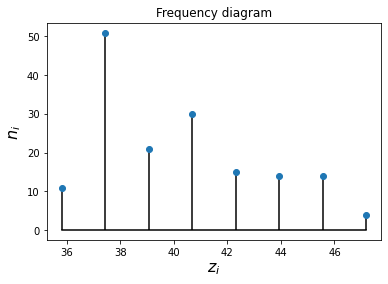

In [6]:
# visualisation
plt.stem(interv_middles, range_frequencies, linefmt='-k', basefmt='-k')
plt.xlabel("$z_i$", fontsize=16)
plt.ylabel("$n_i$", fontsize=16)
plt.title("Frequency diagram")

Text(0.5, 1.0, 'Frequency polygon')

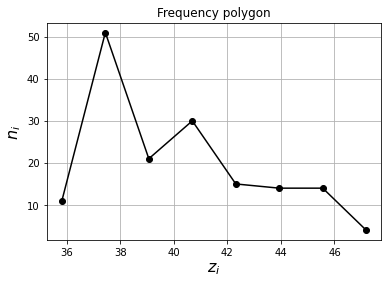

In [7]:
plt.plot(interv_middles, range_frequencies, '-o', color="k")
plt.grid()
plt.xlabel("$z_i$", fontsize=16)
plt.ylabel("$n_i$", fontsize=16)
plt.title("Frequency polygon")

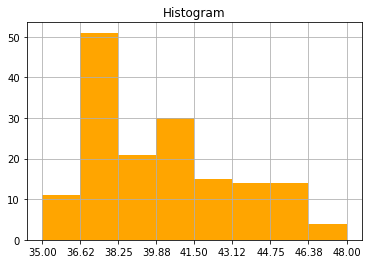

In [8]:
plt.hist(shoe_sizes, bins=range_points, color = 'orange')
plt.xticks(range_points)
plt.grid()
plt.title("Histogram")
plt.show()

In [9]:
# ECDF
freq_cumul = np.cumsum(range_frequencies)
freq_cumul = freq_cumul / len(shoe_sizes)
def output_func(sizes, results):
    print(f"{0:.3f}, x < {sizes[0]}")
    for i in range(len(sizes)-2):
        print(f"{results[i]:.3f}, xє[{sizes[i]}, {sizes[i+1]})")
    print(f"{results[-1]:.3f}, x >= {sizes[-2]}")
print("F(x):")        
output_func(range_points, freq_cumul)

F(x):
0.000, x < 35.0
0.069, xє[35.0, 36.625)
0.388, xє[36.625, 38.25)
0.519, xє[38.25, 39.875)
0.706, xє[39.875, 41.5)
0.800, xє[41.5, 43.125)
0.887, xє[43.125, 44.75)
0.975, xє[44.75, 46.375)
1.000, x >= 46.375


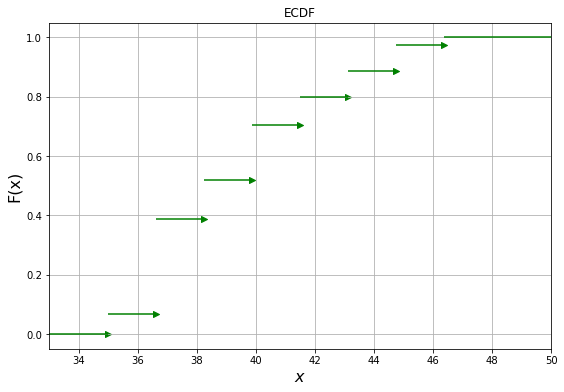

In [10]:
# ECDF plot
y_coord = np.insert(freq_cumul, 0, 0) # y coordinates

x_mins = np.copy(range_points[:-1])
x_mins = np.insert(x_mins, 0, -400)

x_maxs = np.copy(range_points[:-1])
x_maxs = np.append(x_maxs, 5000)
plt.figure(figsize=(9,6))
plt.hlines(y_coord, xmin=x_mins, xmax=x_maxs, colors='green')
plt.title("ECDF")
plt.grid()
plt.xlabel("$x$", fontsize=16)
plt.ylabel("F(x)", fontsize=16)
plt.xlim([33,50])
plt.ylim()

y1 = np.delete(y_coord, -1)
x1 = np.copy(range_points[:-1])
plt.scatter(x1, y1, marker='>', color='green')

In [11]:
# location characteristics
print(f"Median = {np.median(shoe_sizes)}")
max_freq_val = max(range_frequencies)
index_max = range_frequencies.index(max_freq_val)
print(f"Mode = [{interv_middles[index_max]}]")
mean = 0
for i in range(num_intervals):
    mean += interv_middles[i] * range_frequencies[i]
mean /= n
print(f"Mean = {mean}")
squares_for_dev = np.copy(interv_middles)-mean
squares_for_dev = squares_for_dev ** 2 
for i in range(num_intervals):
    squares_for_dev[i] *= range_frequencies[i]
deviation = np.sum(squares_for_dev)
print(f"Deviation = {deviation}")

Median = 39.0
Mode = [37.4375]
Mean = 40.12890625
Deviation = 1494.84130859375


In [12]:
# spread characteristics
range_ = range_points[-1] - range_points[0]
print(f"Range = {range_}")
s2 = deviation / (n-1)
print(f"Variance = {s2}")
D = deviation / n
print(f"Dispersion = {D}")
std = np.sqrt(s2)
print(f"Std = {std}")
cv = std / mean
print(f"Coefficient of variation (CV) = {cv}")
Q1 = shoe_sizes[int((n/4)-1)]
Q2 = shoe_sizes[int((n/2)-1)]
Q3 = shoe_sizes[int((3*n/4)-1)]
print(f"Q1 = {Q1}")
print(f"Q2 = {Q2}")
print(f"Q3 = {Q3}")
print(f"Interquartile range = {Q3 - Q1}")
deciles = [shoe_sizes[int(n*i/10-1)] for i in range(1, 10)]
for i in range(len(deciles)):
    print(f"D{i+1} = {deciles[i]}")
print(f"Interdecile range = {deciles[-1] - deciles[0]}")

Range = 13.0
Variance = 9.401517664111635
Dispersion = 9.342758178710938
Std = 3.0661894370882625
Coefficient of variation (CV) = 0.07640849760484719
Q1 = 38
Q2 = 39
Q3 = 42
Interquartile range = 4
D1 = 37
D2 = 38
D3 = 38
D4 = 39
D5 = 39
D6 = 40
D7 = 41
D8 = 43
D9 = 45
Interdecile range = 8


In [13]:
# form characteristics
def st_moment(k, n, fr, z):
    m = 0
    for i in range(len(z)):
        m += (z[i]**(k)) * fr[i]
    return m / n
def centr_moment(k, n, mean, fr, z):
    mu = 0
    for i in range(len(z)):
        mu += ((z[i]-mean)**(k)) * fr[i]
    return mu / n
st_moments = [st_moment(i, n, range_frequencies, interv_middles) for i in range(5)]
centr_moments = [centr_moment(i, n, mean, range_frequencies, interv_middles) for i in range(5)]
print("Moments (c=0):")
for i in range(len(st_moments)):
    print(f"m{i} = {st_moments[i]}")
print("Central moments:")
for i in range(len(centr_moments)):
    print(f"mu{i} = {round(centr_moments[i],5)}")
mu2 = centr_moments[2]
mu3 = centr_moments[3]
mu4 = centr_moments[4]

Moments (c=0):
m0 = 1.0
m1 = 40.12890625
m2 = 1619.671875
m3 = 65762.25953674316
m4 = 2686320.754989624
Central moments:
mu0 = 1.0
mu1 = 0.0
mu2 = 9.34276
mu3 = 16.76937
mu4 = 199.65064


In [14]:
skewness = mu3 / (mu2**(3/2))
print(f"Skewness = {skewness}")
if skewness > 0:
    print("Most values are on the left.")
elif skewness == 0:
    print("Symmetric")
else:
    print("Most values are on the right.")
kurtosis = mu4 / (mu2**2) - 3
print(f"Excess kurtosis = {kurtosis}")
if kurtosis > 0:
    print("Heavier tails")
elif kurtosis < 0:
    print("Light tails ")
else:
    print("Normal")

Skewness = 0.5872245634484328
Most values are on the left.
Excess kurtosis = -0.7127138549377352
Light tails 
